# Chapter 6: Decision Trees

## Training and Visualizing a Decision Tree

In [0]:
# Training a Decision Tree classifier

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
# Outputting a visualization of the Decision Tree

from sklearn.tree import export_graphviz

export_graphviz(
  tree_clf,
  out_file="iris_tree.dot",
  feature_names=iris.feature_names[2:],
  class_names=iris.target_names,
  rounded=True,
  filled=True,
)

In [0]:
!dot -Tpng iris_tree.dot -o iris_tree.png

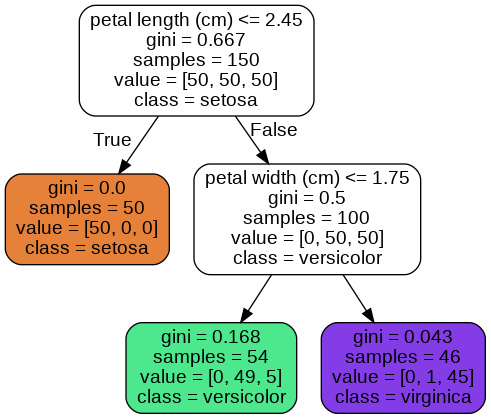

In [0]:
from IPython.display import Image, display

display(Image('iris_tree.png'))

## Making Predictions

In order to classify a new training instance, you start at the root node. In this case, if the petal length is $\leq 2.45$ cm then you go to the root's left child, and the instance is classified as Iris-Setosa. Otherwise, we move to the right node, and decide the class based on whether the petal width is $\leq 1.75$ cm to determine which of the other flower species that the instance is most likely a member of.

The node's `samples` attribute counts how many training instances reach that node while being classified. The `values` attribute indicates how many instances of each class in the training set reach that node. The `gini` attribute indicates the "impurity" of that node. For example, the leftmost node only applies to setosa flowers, so its impurity is zero. The equation for computing the Gini impurity is given by

$$ G_i = 1 - \sum\limits_{k=1}^n p_{i,k}^{\;\;2} $$

where $p_{i,k}$ is the ratio of class $k$ instances among the training instances of the $i^\text{th}$ node. For example, at the leftmost node, the Gini impurity is $1 - (50/50) - (0/50) - (0/50) = 0$. At the rightmost node, the Gini impurity is $1 - (0/46) - (1/46) - (45/46) \approx 0.043$.

### Model Interpretation: White Box Versus Black Box

Decision trees belong to a class of models known as <i>white box models</i>, which are models where we can manually see how the deicision boundaries between classes is determined. This is in contrast to <i>black box models</i> like neural networks which might make good predictions, but it is difficult to explain simply why the model made the decisions that it did.

## Estimating Class Probabilities

If the model were to try to classify an instance with a petal that is 5 cm long and 1.5 cm wide, then the corresponding leaf node would be the the depth-2 left node. If we ask the model for the probabilites that the instance belongs to each class, we would get 0% for Iris-Setosa (0/54), 90.7% for Iris-Versicolor (49/54), and 9.3% for Iris-Virginica (5/54). The code below checks this

In [0]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [0]:
tree_clf.predict([[5, 1.5]])

array([1])

## The CART Training Algorithm

Scikit_learn uses the <i>Classification And Regression Tree</i> (CART) algorithm to train Decision Trees. The algorithm starts by splitting the training set into 2 subsets using a single feature, $k$, and a threshold, $t_k$. It chooses $k$ and $t_k$ by finding the values that minimize the cost function given by

$$ J(k, t_k) = \frac{m_\text{ left}}{m} G_\text{ left} + \frac{m_\text{right}}{m} G_\text{right} $$

where $G_\text{left/right}$ is the Gini impurity of the left/right subset and $m_\text{left/right}$ is the number of instances in the left/right subset. Once it splits the training set into the left and right subsets, it recurses the algorithm on each subset. It stops recursing once it either reaches the maximum depth or when any possible partition will not reduce the impurity of the subset.

Unfortunately, finding the optimal tree is an <i>NP-Complete</i> problem, and is an $O(\exp(m))$ operation, making it intractable for even small datasets. This is why generally the Decision Tree just settles with a tree that is "reasonably" good.

## Computational Complexity

The complexity of predicting the class of a new instance, which is equivalent to a binary tree search, is just $O(\log(m))$. The complexity of training the model is $O(n\times m\log(m))$. For small training sets, Scikit-Learn can speed up training by presorting the data (set `presort=True`), but presorting also slows down training large datasets.

## Gini Impurity or Entropy?

In Machine Learning, the term <i>entropy</i> fequently is used as an impurity measure. A set with 0 entropy is a set whose classes are all the same. The entropy of the $i^\text{th}$ node is given by

$$ H_i = - \underset{p_{i,k} \neq 0}{\sum\limits_{k=1}^n} p_{i,k} \log(p_{i,k}) $$

where $p_{i,k}$ is the same as the equation for the Gini Impurity above. By default, Scikit-Learn's Decision Tree trains models trying to minimize the Gini impurity, but you can also have it use the entropy instead by setting the `criterion` hyperparameter to `'entropy'`.

## Regularization Hyperparameters

Decision Trees belong to a class of models called <i>nonparametric models</i>, which means the number of parameters is not determined prior to training. Linear models belong to a class of models called <i>parametric models</i> which have a fixed number of degrees of freedom. Parametric models are less likely to overfit the training data but more likely to undefit the training data.

Like linear models, Decision Trees can reduce their risk of overfitting the data using regularization. One way Decision Trees do this is by setting the maximum depth of the tree. Scikit-Learn let's you set the maximum depth, as well as other attributes of the `DecisionTreeClassifier` class to regularize model.

## Regresssion

In [0]:
# An example of a Decision Tree being used for regression on a noisy
# quadratic dataset.

from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Noisy quadratic dataset from Chapter 4.
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

export_graphviz(
  tree_reg,
  out_file="iris_tree2.dot",
  feature_names='x',
  class_names=iris.target_names,
  rounded=True,
  filled=True,
)

In [0]:
!dot -Tpng iris_tree2.dot -o iris_tree2.png

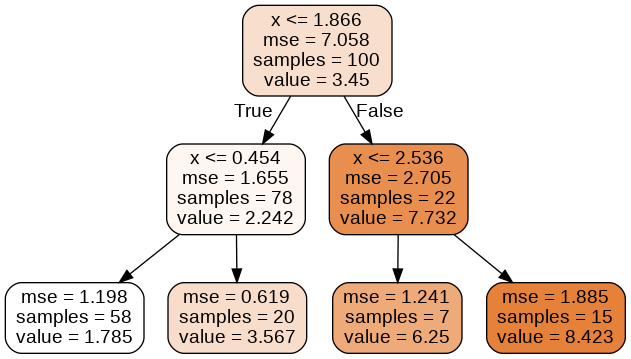

In [0]:
display(Image('iris_tree2.png'))

A Decision Tree Regressor is the same as a Decision Tree classifier except it predicts a value at each node instead of a class. The CART algorithm works almost exactly the same way, except it minimizes a different cost function,

$$ J(k, t_k) = \frac{m_\text{ left}}{m} \,\text{MSE}_\text{ left} + \frac{m_\text{ right}}{m} \,\text{MSE}_\text{ right}
\\
\text{where} \;\; \left\{ \begin{matrix}
\text{MSE}_\text{ node} = \sum\limits_{i\,\in\,\text{node}}
\left( \hat{y}_\text{node} - y^{(i)} \right)^2 \\
\hat{y}_\text{node} = \frac{1}{m_\text{ node}} \sum\limits_{i\,\in\,\text{node}}
y^{(i)} \end{matrix} \right. $$

## Instability

Decision Trees are very simple and still do a remarkably good job fitting to training data. However, they tend to be very sensitive to the training data and to transformations like rotation. One way to improve the models is by averaging the decisions made by many trees, as we will see later on.

## Exercises

### 1. What is the approximate depth of a Decision Tree trained (without restrictions) on a training set with 1 million instances?

Since the depth of a Decision tree is approximately $\log_2(m)$ where $m$ is the size of the training set, it follows that

$$ d = \log_2(m) = \log_2\left(10^6\right) \approx 19.93 $$

where $d$ be the approximate depth of the tree. So the Decision Tree's depth is approximately 20 nodes.

### 2. Is a node's Gini impurity generally less or more than its parent's? Is it <i>generally</i> or always lower/greater.

The Gini impurity is given by

$$ G_i = 1 - \sum\limits_{k=1}^n p_{i,k}^{\;\;2} $$

where $p_{i,k}$ is the ratio of class $k$ instances among the training instances of the $i^\text{th}$ node, or in a parent's case, the nodes in its leaf descendants. Given that a parent was able to find a partition of the set with less impurity than if it were a leaf node, by design a parent has higher Gini impurity than its children. However, it is possible for a node's parent to have a lower Gini impurity if that node's own children lead to lower impurity scores.

### 3. If a Decision Tree is overfitting a training set, is it a good idea to try decreasing `max_depth`?

Yes, decreasing the max depth of a Decision Tree will cause it to overfit data less.

### 4. If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?

No, scaling the input features would not help an undefitting Decision Tree.

### 5. If it takes one hour to train a Decision Tree on a training set containing 1 million instances, roughly how much more time will it take to train another Decision Tree on a training set containing 10 million instances?

The training time of a decision tree on a training set of $m$ instances with $n$ features is $O(n\times m\log_2(m))$. It follows that

$$ 10^6 \log_2\left(10^6\right) \approx 1.99 \times 10^7 $$

and that

$$ 10^7 \log_2\left(10^7\right) \approx 2.33 \times 10^8. $$

So therefore it would take the model approximately 12 times as much time (12 hours) to train on a training set of 10 million instances.

### 6. If your training set contains 100,000 instances, will setting `presort=True` speed up training?

Setting `presort=True` will speed up training a Decision Tree for small datasets. However, for a training set with 100,000 instances, `presort=True` will actually make training slower.

### 7. Train and fine-tune a Decision Tree for the moons dataset.

#### a. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

In [0]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4)

#### b. Split it into a training set and test set using `train_test_split()`.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.2, random_state=42)

#### c. Use grid search with cross-validation (with the help of the `GridSearchCV` class) to find good hyperparameter values for a `DecisionTreeClassifier`. Hint: try various values for `max_leaf_nodes`

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_leaf_nodes': range(10, 40), 'min_samples_split': range(2, 6)}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_leaf_nodes': 13, 'min_samples_split': 2}

#### d. Train it on the full training set using those hyperparameters, and measue your model's performance on the test set. You should get roughly 85% to 87% accuracy.

In [0]:
grid_search.best_estimator_.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)

0.851

### 8. Grow a forest.

#### a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's `ShuffleSplit` class for this.

In [0]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=1000, test_size=len(X_train)-100)

X_train_subsets = []
y_train_subsets = []

for idx, _ in rs.split(X_train):
  X_train_subsets.append(X_train[idx])
  y_train_subsets.append(y_train[idx])

#### b. Train one Decision Tree on each subset, using the best hyperparamer values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on a smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only 80% accuracy.

In [0]:
forest = [DecisionTreeClassifier(**grid_search.best_params_)
         for _ in range(1000)]
best_score = 0
scores = []
for dtc, X_train_sub, y_train_sub in zip(forest, X_train_subsets,
                                         y_train_subsets):
  dtc.fit(X_train_sub, y_train_sub)
  score = dtc.score(X_test, y_test)
  scores.append(score)
  if score > best_score:
    best_score = score
print('Best score:', best_score)
print('Avg score:', np.mean(scores))

Best score: 0.853
Avg score: 0.800872


#### c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's `mode()` function for this). This gives you <i>majoriy-vote</i> predictions over the test set.

In [0]:
from scipy.stats import mode

y_pred = []
for x in X_test:
  predictions = []
  for dtc in forest:
    predictions.append(dtc.predict([x])[0])
  y_pred.append(mode(predictions).mode[0])

#### d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.8565